In [39]:
import pandas as pd
import numpy as np
import math as mt

import scipy.stats as ss

In [40]:
delivery_ab_test_data = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 4/experiment_lesson_4.csv")

In [41]:
delivery_ab_test_data.head()

order_id  delivery_time  district experiment_group
0      3159           44.0  Purlieus          control
1     10426           51.0  Purlieus          control
2      9155           46.0  Purlieus          control
3     10699           34.0  Purlieus          control
4     10061           43.0  Purlieus          control

In [42]:
#step 3

In [43]:
delivery_ab_test_data.query("experiment_group == 'control'")

order_id  delivery_time  district experiment_group
0          3159           44.0  Purlieus          control
1         10426           51.0  Purlieus          control
2          9155           46.0  Purlieus          control
3         10699           34.0  Purlieus          control
4         10061           43.0  Purlieus          control
...         ...            ...       ...              ...
10087      2708           23.0   Central          control
10088      3918           45.0   Central          control
10089      9544           41.0    Suburb          control
10090      1101           38.0   Central          control
10091      7676           55.0   Central          control

[10092 rows x 4 columns]

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

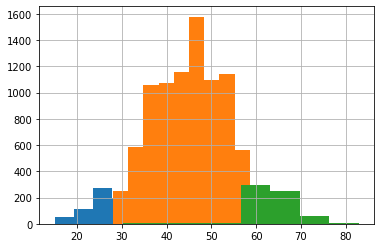

In [44]:
delivery_ab_test_data.query("experiment_group == 'control'").groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

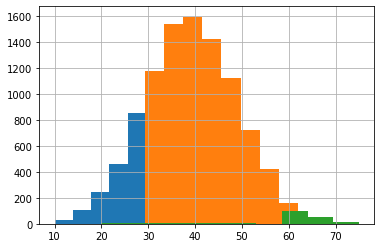

In [45]:
delivery_ab_test_data.query("experiment_group == 'test'").groupby('district').delivery_time.hist()

In [46]:
# step 4

In [47]:
mt.fabs(delivery_ab_test_data.query("experiment_group == 'control'").order_id.count()-delivery_ab_test_data.query("experiment_group == 'test'").order_id.count())



12.0

In [48]:
abs(delivery_ab_test_data.query("experiment_group == 'control'").order_id.count()-delivery_ab_test_data.query("experiment_group == 'test'").order_id.count())

12

In [49]:
#step 5

In [53]:
controlgroup_deliverytime = delivery_ab_test_data.query("experiment_group == 'control'").delivery_time

In [54]:
testgroup_deliverytime = delivery_ab_test_data.query("experiment_group == 'test'").delivery_time

In [55]:
ss.normaltest(controlgroup_deliverytime)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [56]:
ss.normaltest(testgroup_deliverytime)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [59]:
round(controlgroup_deliverytime.std(),2)

9.99

In [60]:
round(testgroup_deliverytime.std(),2)

9.88

In [61]:
ss.ttest_ind(controlgroup_deliverytime,testgroup_deliverytime)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [65]:
round((testgroup_deliverytime.mean()/controlgroup_deliverytime.mean()-1)*100,2)

-13.35